<a href="https://colab.research.google.com/github/PoliUniLu/cora/blob/master/cora_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Deriving prime implicants and irredundant sums from a binary truth table 


**Step 1: Install the CORA package**

In [ ]:
pip install git+https://github.com/PoliUniLu/cora.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PoliUniLu/cora.git to /tmp/pip-req-build-2vfhj5bc
  Running command git clone --filter=blob:none --quiet https://github.com/PoliUniLu/cora.git /tmp/pip-req-build-2vfhj5bc
  Resolved https://github.com/PoliUniLu/cora.git to commit 41ece7e10370dc62b63d6297b8efc1dfd3917627
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/PoliUniLu/petric.git to /tmp/pip-install-p4k_6gi8/nativepetric_92120243762041eaa37007d57443bd99
  Running command git clone --filter=blob:none --quiet https://github.com/PoliUniLu/petric.git /tmp/pip-install-p4k_6gi8/nativepetric_92120243762041eaa37007d57443bd99
  Resolved https://github.com/PoliUniLu/petric.git to commit 3ea10e769c4d5baeab9a460e0162ed6bb3e71ee1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

**Step 2: Create (or load) the truth table.**

In [ ]:
import cora
import pandas as pd

df = pd.DataFrame([[1,1,0,1],
                   [0,0,1,1],
                   [1,0,1,0],
                   [0,1,0,1]], columns=["A","B","C","OUT"])
df

,A,B,C,OUT
0,1,1,0,1
1,0,0,1,1
2,1,0,1,0
3,0,1,0,1


**Step 3: Create an instance of `OptimizationContext` from the truth table.** 

The `OptimizationContext` holds the data and the intermediate results to make subsequent queries more efficient (instead of computing the intermediate results from scratch).

In [ ]:
context = cora.OptimizationContext(data = df, output_labels = ["OUT"])

**Step 4: Call the `get_prime_implicants()` function on the `OptimizationContext` instance.**

The result of this step is a tuple of prime implicants. The string representation of a prime implicant object is such that:
*   a positive literal is printed in upper case,
*   a negative literal is printed in lower case, and
*   an essential prime implicant is prefixed with a hash (\#).








In [ ]:
PIs = context.get_prime_implicants()
print(PIs)

(B, c, #a)


**Step 5: Call the `prime_implicant_chart()` function on the `OptimizationContext` instance.** 

The result of this step is a dataframe representing the prime implicant chart (coverage matrix). The labels of the columns correspond to the truth table rows with positive outputs. The rows correspond to the prime implicants. If a prime implicant covers a positive row of the truth table, it receives a `1` entry in the corresponding position; an entry `0` otherwise.



In [ ]:
context.prime_implicant_chart()

,0,1,3
B,0,1,1
c,0,1,1
#a,1,1,0


**Step 6: Call the `Get_irrenduntant_sums()` function on the `OptimizationContext` instance.**

The result of this step is a list of objects representing the irredundant sums. 
Note that the number of all irredundant sums can grow exponentially. Requesting all irredundant sums for a large prime implicant chart might thus consume a lot of memory and lead to out-of-memory crashes.

In [ ]:
context.get_irredundant_sums()

[M1: #a + B, M2: #a + c]

# 2. Conversion of raw data to truth table

The following example includes a demonstration of how to convert raw data to a truth table when the data contain inconsistencies, that is, when at least two cases having identical values on the inputs show different values on the output.  


**Step 1: Create the truth table with the following parameters:**

*  `n_cut`,
*  `inc_score1`, 
*  `inc_score2`,
*  `U`.

Truth table rows that contain fewer than `n_cut` cases are coded as unobserved. If the number of such cases is at least `n_cut`, rows with an inclusion
score of at least `inc_score1` are coded as positive (OUT = "1"), rows with an inclusion score below `inc_score1` but with at least `inc_score2`, when specified, are coded as undefined, and rows with an inclusion score below `inc_score2` are coded as negative (OUT = "0"). The parameter `U` defines the output value of undefined rows. 

For the data example below, inconsistencies are present for cases (1,2,3) and (4,5). 

In [ ]:
df = pd.DataFrame([[1,1,0,1],
                   [0,0,1,1],
                   [0,0,1,0],
                   [0,0,1,0],
                   [1,0,1,0],
                   [1,0,1,1],
                   [0,1,0,1]], columns=["A","B","C","OUT"])
context = cora.OptimizationContext(df, ["OUT"], inc_score1 = 0.5, n_cut = 1)
df

,A,B,C,OUT
0,1,1,0,1
1,0,0,1,1
2,0,0,1,0
3,0,0,1,0
4,1,0,1,0
5,1,0,1,1
6,0,1,0,1


**Step 2: Call `get_preprocessed_data()` function to derive the truth table with the provided parameter settings in Step 1.**


In [ ]:
context.get_preprocessed_data()

,A,B,C,OUT
0,0,0,1,0
1,0,1,0,1
2,1,0,1,1
3,1,1,0,1


**Step 3: Call `pi_details()` function to compute the inclusion and coverage scores.**

The inclusion score of a prime implicant is the ratio between the number of cases that are covered by this prime implicant and show the analyzed outcome, and the number of cases that are covered by this prime implicant.

The coverage score of a prime implicant is the ratio between the number of cases that are covered by this prime implicant and show the analyzed outcome, and the number of cases that show the analyzed outcome.

In [ ]:

context.pi_details()

,PI,Cov.r,Inc.,M1,M2
0,#A,0.5,0.67,0.25,0.25
1,c,0.5,1.00,0.25,NaN
2,B,0.5,1.00,NaN,0.25


**Step 4: Call `system_details()` function for descriptive statistics of the solution.**

In [ ]:
context.system_details()

,Cov.,Inc.
Solution details,0.75,0.75


# 3. Optimization algorithms

Currently, CORA offers two algorithms:

* ON-DC: the classical Quine-McCluskey algorithm operating on positive (ON) and don't care (DC) terms, and
* ON-OFF: the modified version of McCluskey's algorithm operating on positive and negative (OFF) terms (default in CORA).

Note that for highly unspecified functions, ON-OFF should be used for performance reasons. 

Specify the optimization algorithm by specifying the `algorithm` parameter when constructing the `OptimizationContext`.

In [ ]:
df = pd.DataFrame([[1,2,0,1,1],
                   [1,1,1,0,1],
                   [0,2,1,0,0],
                   [0,2,2,0,1],],columns=["A","B","C","D","OUT"])
df


,A,B,C,D,OUT
0,1,2,0,1,1
1,1,1,1,0,1
2,0,2,1,0,0
3,0,2,2,0,1


Note that the string representation of a prime implicant differs for multi-value data. Instead of using upper / lower case notation to denote positive / negative literals, for multi-value implicants, the literal value is written in curly (`{}`) brackets.




In [ ]:
context = cora.OptimizationContext(df, ["OUT"], algorithm = 'ON-OFF')
context.get_prime_implicants()

[B, c]

In [ ]:
df = pd.DataFrame([[1,2,0,1,1],
                   [1,1,1,0,2],
                   [0,2,1,0,0],
                   [0,2,2,0,1],], columns=["A","B","C","D","OUT"])
df


,A,B,C,D,OUT
0,1,2,0,1,1
1,1,1,1,0,2
2,0,2,1,0,0
3,0,2,2,0,1


Note that, if the output column contains non-binary values, it is necessary to convert them to binary range during the preprocessing step. When creating an instance of `OptimizationContext`, provide a list of values to be mapped to 1 by listing them in curly (`{}`) brackets after the name of the output column:

In [ ]:
context = cora.OptimizationContext(df, ["OUT{1,2}"], algorithm = 'ON-OFF')
context.get_preprocessed_data()


,A,B,C,D,OUT
0,0,2,1,0,0
1,0,2,2,0,1
2,1,1,1,0,1
3,1,2,0,1,1


In [ ]:
context.get_irredundant_sums()

[M1: #C{2} + A{1}, M2: #C{2} + B{1} + C{0}, M3: #C{2} + B{1} + D{1}]

Call `get_solution_dataframe()` to further explore the derived solution. The function returns a dataframe, summarizing the occurrences of each implicant in each system.

In [ ]:
context.get_solution_dataframe()

,#C{2},A{1},B{1},D{1},C{0}
0,1,1,0,0,0
1,1,0,1,0,1
2,1,0,1,1,0


# 4. Multi-output optimization

One of CORA's central features is its ability to optimize multi-output functions.


**Step 1: Specify the inputs and the outputs.**

In [ ]:
df = pd.DataFrame([[1,2,0,1,1,2,1],
                   [1,1,1,0,2,0,0],
                   [0,2,1,0,0,1,2],
                   [0,2,2,0,1,1,1],],columns=["A","B","C","D","OUT1","OUT2","OUT3"])
df


,A,B,C,D,OUT1,OUT2,OUT3
0,1,2,0,1,1,2,1
1,1,1,1,0,2,0,0
2,0,2,1,0,0,1,2
3,0,2,2,0,1,1,1


**Step 2: Derive the truth table.**

In [ ]:
context = cora.OptimizationContext(df, ["OUT1{1,2}", "OUT2{1}", "OUT3{1,0}"], algorithm = 'ON-OFF')
context.get_preprocessed_data()

,A,B,C,D,OUT1,OUT2,OUT3
0,0,2,1,0,0,1,0
1,0,2,2,0,1,1,1
2,1,1,1,0,1,0,1
3,1,2,0,1,1,0,1


**Step 3: Derive the multi-output prime implicants.**

In [ ]:
context.get_prime_implicants()

[C{2}, A{1}, B{1}, D{1}, C{0}, B{2}*C{1}, A{0}, B{2}*D{0}]

**Step 4: Derive the multi-output prime implicant chart.**

Each prime implicant in the multi-output prime implicant chart contains indices denoting the corresponding outputs in curly brackets.  

In [ ]:
context.prime_implicant_chart()

,0,1,2
"C{2}, [1, 2, 3]",0,0,0
"A{1}, [1, 3]",0,0,1
"B{1}, [1, 3]",0,0,1
"D{1}, [1, 2, 3]",0,0,0
"C{0}, [1, 2, 3]",0,0,0
"B{2}*C{1}, [2]",1,0,0
"A{0}, [1, 2, 3]",0,0,0
"B{2}*D{0}, [2]",1,1,0


**Step 5: Derive the systems of irredundant sums.** 

In multi-output optimization, the solution space is comprised of a number of irredundant systems. Individual functions need not be irredundant, but the entire system is always irredundant. 

In [ ]:
context.get_irredundant_systems()

[---- System 1 ----
 OUT1{1, 2}: B{1}
 OUT2{1}: B{2}*D{0}
 OUT3{0, 1}: B{1}
 , ---- System 2 ----
 OUT1{1, 2}: A{1}
 OUT2{1}: B{2}*D{0}
 OUT3{0, 1}: A{1}
 ]

The summary dataframe separately specifies an occurence of a prime implicant inside each output within a system. 

In [ ]:
context.get_solution_dataframe()

,C{2},A{1},B{1},D{1},C{0},B{2}*C{1},A{0},B{2}*D{0},Output,System
0,0,0,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,2,1
2,0,0,1,0,0,0,0,0,3,1
3,0,1,0,0,0,0,0,0,1,2
4,0,0,0,0,0,0,0,1,2,2
5,0,1,0,0,0,0,0,0,3,2


# 5. Data mining

One of CORA's unique features is its ability to data mine. This feature enables users to iteratively work with a subset of the input variables and evaluate the results derived with the subset of input space.

**Step 1: Call  `data_mining()` function to produce the tuples.**
The parameters of the the function are the same as the ones for the  OptimizationContext necessary for data preprocessing described in Section 2. The additional parameter `len_of_tuple` specifies the number of the input variables.


In [ ]:
df = pd.DataFrame([[1,2,0,1,1],
                   [1,1,1,0,1],
                   [0,2,1,0,0],
                   [0,2,2,0,1],], columns=["A","B","C","D","OUT"])
df
                

,A,B,C,D,OUT
0,1,2,0,1,1
1,1,1,1,0,1
2,0,2,1,0,0
3,0,2,2,0,1


In [ ]:
cora.data_mining(df, ["OUT"], len_of_tuple= 2, inc_score1= 0.5, n_cut =1 )

,Combination,Nr_of_systems,Inc_score,Cov_score,Score
0,"[A, B]",1,0.75,1.0,0.75
1,"[A, C]",1,1.00,1.0,1.00
2,"[A, D]",1,0.75,1.0,0.75
3,"[B, C]",1,1.00,1.0,1.00
4,"[B, D]",1,0.75,1.0,0.75
5,"[C, D]",1,0.75,1.0,0.75


# 6. Logigram

CORA is the only configurational comparative method to display the results of optimization algorithms with logic diagrams. `Logigram` is a python standalone module to draw two level logic diagrams.

**Step 1: Install the package**


In [ ]:
pip install git+https://github.com/PoliUniLu/Logigram.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PoliUniLu/Logigram.git to /tmp/pip-req-build-vh1cy7yd
  Running command git clone --filter=blob:none --quiet https://github.com/PoliUniLu/Logigram.git /tmp/pip-req-build-vh1cy7yd
  Resolved https://github.com/PoliUniLu/Logigram.git to commit 573c85d187487ce3ce6179d0d6687af81e06a097
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Step 2: Call `draw_schem()` function to draw the logic diagram.**


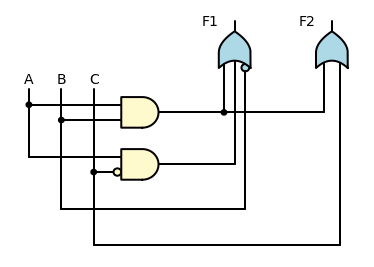

In [ ]:
import logigram as lg
f = lg.draw_schem(['A*B+c*A+b<=>F1','A*B+C<=>F2'],color_or = 'lightblue',color_and = 'lemonchiffon') 
 